In [1]:
import sys
sys.path.append("/home/sardarchitect/repos/fscoreai-ml/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sample_data import sample_data
from fscoreai.linear_model import linear_regression

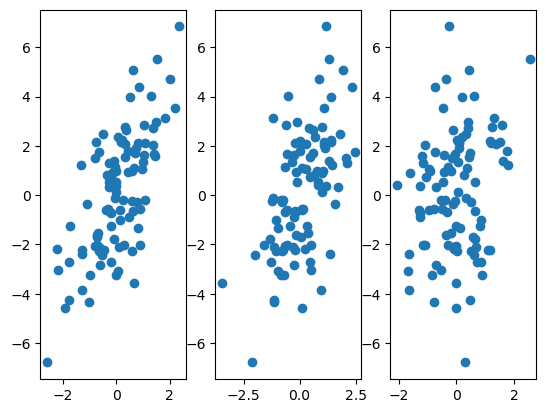

In [5]:
X, y = sample_data.simulate_multilinear_data()
X.shape, y.shape

num_features = X.shape[1]

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X[:, d], y)

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

100%|█| 100000/100000 [00:02<00:00, 3



--------------
SkLearn Weights: 

[-0.10275239] [[1.71675816 1.34612107 0.62028619]]
--------------


--------------
Statistical Weights: 

[-0.10275239] [[1.71675816]
 [1.34612107]
 [0.62028619]]
--------------


--------------
Gradient Descent Weights: 

[-0.10275208] [[1.71675965]
 [1.34611786]
 [0.62027526]]
--------------



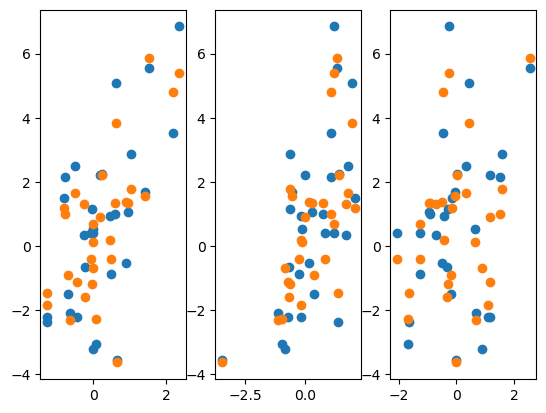

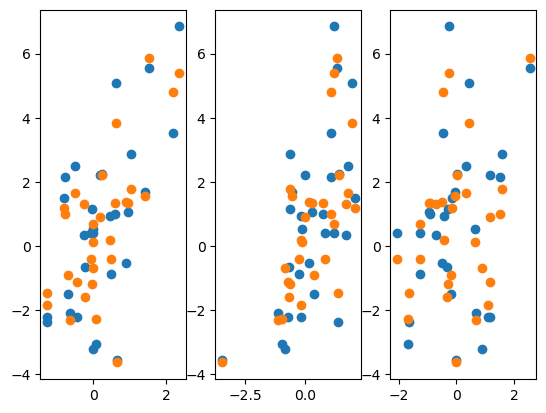

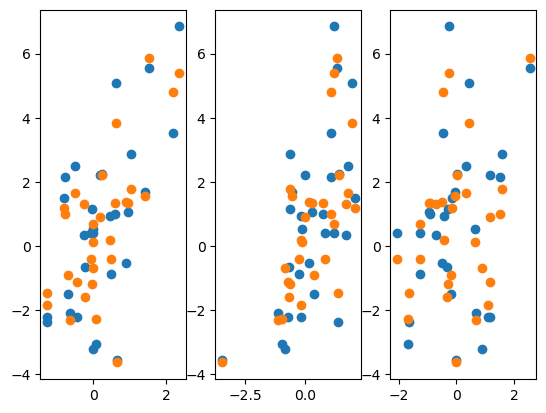

In [8]:
model_0 = LinearRegression()
model_0.fit(X_train, y_train)
y_pred_0 = model_0.predict(X_test)

model_1 = linear_regression.LinearRegression()
model_1.fit_statistical(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

model_2 = linear_regression.LinearRegression()
model_2.fit(X_train, y_train, lr=1e-4, epochs=100000)
y_pred_2 = model_2.predict(X_test)

print("\n--------------")
print("SkLearn Weights: \n")
print(model_0.intercept_, model_0.coef_)
print("--------------\n")

print("\n--------------")
print("Statistical Weights: \n")
print(model_1.intercept_, model_1.coef_)
print("--------------\n")

print("\n--------------")
print("Gradient Descent Weights: \n")
print(model_2.intercept_, model_2.coef_)
print("--------------\n")

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_0)

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_1)

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_2)

plt.show()